In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import random
import pandas as pd

create_order_keywords = ["order", "place an order", "I'll have", "I want", "get me", "bring me", "add", "take"]
remove_order_keywords = ["remove", "cancel", "take off", "delete", "exclude", "change my mind"]
no_intent_keywords = ["hello", "how are you", "what’s up", "tell me a joke", "thank you", "bye"]
food_items = ["pizza", "burger", "fries", "pasta", "salad", "sandwich", "steak", "lasagna", "soup", "grilled salmon"]
templates = {
    "Create Order": [
        "Order this {}.", 
        "Take my order: {}, {}, and {}.", 
        "Get me a {}.", 
        "Add {} and {} to my order.",
        "Place an order for {}.", 
        "I want {}, {}.", 
        "Bring me a {}.", 
        "Let me have {}.",
        "Get {}, {}, {} for me.", 
        "I’ll take {}.", 
        "Just give me a {}.", 
        "Add this {}, {}.",
        "Order {} and {}.", 
        "Grab me a {}.", 
        "Can I get a {}?", 
        "I’d like to have a {}.",
        "Include {} in my cart.", 
        "I’ve been craving a {}, can you add that?",
        "Give me a {} with extra cheese.",
        "I’ll have a {}, but can you make it spicy?",
        "Add a {} to my meal, please.",
        "Can I get {} with a side of fries?",
        "Let’s make it a {} with no onions.",
        "I’d like a {} and a drink.",
        "Can you add {} and {} to my order?",
    ],
    "Remove Order": [
        "I changed my mind about the {}, can you remove it?", 
        "Please cancel my order for the {}.",
        "Take the {} out of my order.", 
        "Scratch the {} off my list.", 
        "Cancel the {} from the cart.",
        "Remove the {} from my cart.",
        "Forget the {} I added.",
        "Delete the {} from my order.",
        "Take the {} off the menu for me.",
        "Cancel that {} from my order.",
        "I no longer want the {} in my order.",
        "Take out the {} and add something else.",
        "Can you cancel the {} I selected?",
        "I don’t want the {} anymore.",
        "Please remove {} from my order.",
        "I’d like to delete the {}.",
        "Please make my order without the {}.",
        "Change my order, remove the {}.",
        "Remove the {} I added earlier.",
        "Forget the {} from my list.",
        "Can you take the {} off the order?"
    ],
    "No Intent": [
        "Do you have a {} available?",
        "What’s the price of a {}?",
        "Can you tell me about the {}’s ingredients?",
        "Is the {} freshly made?",
        "What comes with the {}?",
        "Does the {} include any sides?",
        "Is the {} gluten-free?",
        "Can you make the {} extra spicy?",
        "What drinks pair well with a {}?",
        "Can you confirm if the {} is available?",
        "Can I customize my {} with extra toppings?",
        "Does the {} come without cheese?",
        "Can I have the {} with no onions?",
        "Can I make the {} vegan?",
        "Does the {} come with sugar-free options?",
        "Will my {} be delivered fresh?",
        "How long will it take to prepare the {}?",
        "When can I expect my {}?",
        "Can you deliver the {} to my location?",
        "Is the {} available for pickup?",
        "What’s the most popular item on your menu?",
        "Can you recommend something similar to a {}?",
        "What’s your best-selling {}?",
        "Is there a chef’s special that includes a {}?",
        "Do you have any specials with {} today?",
        "Does my order include a {}?",
        "Are there discounts on the {}?",
        "Do you have a family-sized portion of {}?",
        "What’s the nutritional value of a {}?",
        "Welcome, sir! How can I help you today?",
        "Hello! What can I get for you?",
        "Good day! How may I assist you with your order?",
        "Hi there! Ready to place your order?",
        "Welcome to Restaurant! What would you like today?",
        "Hello! Looking for something special?",
        "Hi! Do you need help deciding on your meal?",
        "Good evening! What’s on your mind today?",
        "Welcome back! What can I get started for you?",
        "Hi! Would you like to hear about our specials?",
        "Hello! Are you ready to order, or do you need some recommendations?",
        "Good morning! Would you like to place an order?",
        "Thank you for your order!",
        "Thanks! Your food will be ready shortly.",
        "Thank you! Have a great day!",
        "Thanks for choosing Restaurant!",
        "Thank you for dining with us!",
    ]
}

data = []

for intent, intent_templates in templates.items():
    if intent == "Create Order":
        for _ in range(500):
            food = random.choice(food_items)
            second_food = random.choice(food_items)
            template = random.choice(intent_templates)
            num_placeholders = template.count("{}")

            if num_placeholders == 1:
                text = template.format(food)
            elif num_placeholders == 2:
                text = template.format(food, second_food)
            elif num_placeholders == 3:
                third_food = random.choice(food_items)
                text = template.format(food, second_food, third_food)
            else:
                text = template 
            
            data.append((text, 1, intent))
    elif intent == "Remove Order":
        for _ in range(500):
            food = random.choice(food_items)
            template = random.choice(intent_templates)
            num_placeholders = template.count("{}")

            if num_placeholders == 1:
                text = template.format(food)
            else:
                text = template 
            
            data.append((text, 2, intent))
    elif intent == "No Intent":
        for _ in range(500):
            template = random.choice(intent_templates)
            num_placeholders = template.count("{}")

            if num_placeholders == 1:
                food = random.choice(food_items)
                text = template.format(food)
            elif num_placeholders == 2:
                food = random.choice(food_items)
                second_food = random.choice(food_items)
                text = template.format(food, second_food)
            else:
                text = template 
            
            data.append((text, 0, intent))

df = pd.DataFrame(data, columns=["text", "label", "label_text"])

df.to_csv("intent_classification.csv", index=False)

print(df.sample(10))

                                           text  label    label_text
172                           Get me a lasagna.      1  Create Order
885              Take the soup out of my order.      2  Remove Order
1330                When can I expect my pasta?      0     No Intent
843               Remove the soup from my cart.      2  Remove Order
421     Get grilled salmon, pizza, soup for me.      1  Create Order
213                   Place an order for steak.      1  Create Order
360                         I’ll take sandwich.      1  Create Order
381                        Just give me a soup.      1  Create Order
212   Add pasta and grilled salmon to my order.      1  Create Order
377       Let’s make it a fries with no onions.      1  Create Order


In [3]:
label_mapping = {
    "No Intent": 0,
    "Create Order": 1,
    "Remove Order": 2
}

In [4]:
import pandas as pd 

df = pd.read_csv("intent_classification.csv")
df

,text,label,label_text
0,Let me have sandwich.,1,Create Order
1,"I want sandwich, burger.",1,Create Order
2,"I want pasta, fries.",1,Create Order
3,I’ll take burger.,1,Create Order
4,Add lasagna and sandwich to my order.,1,Create Order
...,...,...,...
1495,Thanks for choosing Restaurant!,0,No Intent
1496,Can you deliver the lasagna to my location?,0,No Intent
1497,Is the salad gluten-free?,0,No Intent
1498,Is there a chef’s special that includes a sand...,0,No Intent


In [5]:
df.sample(10)

,text,label,label_text
1458,Welcome to Restaurant! What would you like today?,0,No Intent
1334,Do you have a pasta available?,0,No Intent
649,Please cancel my order for the grilled salmon.,2,Remove Order
1120,"Hello! Are you ready to order, or do you need ...",0,No Intent
1228,Do you have a steak available?,0,No Intent
713,Take the salad out of my order.,2,Remove Order
477,Grab me a pizza.,1,Create Order
1491,Hi! Do you need help deciding on your meal?,0,No Intent
1464,"Welcome, sir! How can I help you today?",0,No Intent
1166,Thanks for choosing Restaurant!,0,No Intent


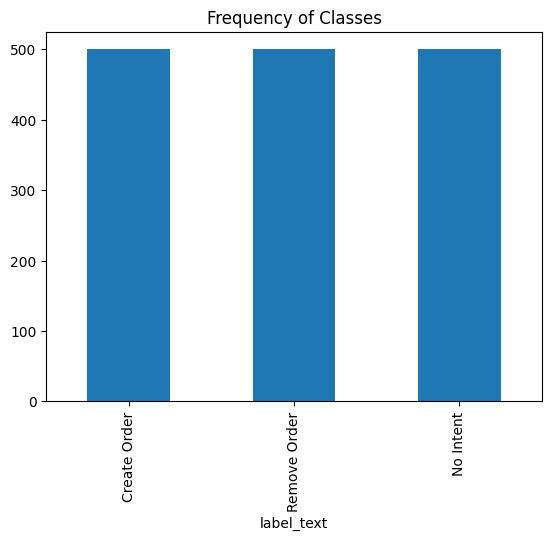

In [6]:
import matplotlib.pyplot as plt

df['label_text'].value_counts(ascending=True).plot.bar()
plt.title("Frequency of Classes")
plt.show()

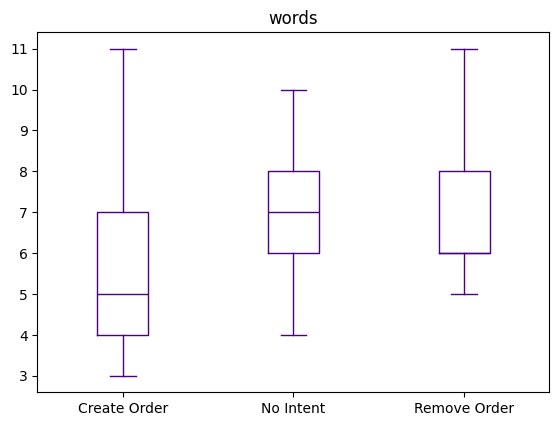

In [7]:
df['words'] = df['text'].str.split().apply(len)
df.boxplot("words", by="label_text", grid=False, showfliers=False, color='indigo')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [8]:
from transformers import AutoTokenizer

model_distil = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_distil)

In [9]:
text = "Can you delete the pasta from the order?"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2064, 2017, 3972, 12870, 1996, 24857, 2013, 1996, 2344, 1029, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [10]:
def tokenize(batch):
    # padding : Padding to zero for the longest sample
    # truncation : Cut to fit the model's maximum context size
    return tokenizer(batch, padding=True, truncation=True)

In [11]:
df['text'].iloc[:2].tolist()

['Let me have sandwich.', 'I want sandwich, burger.']

In [12]:
print(tokenize(df['text'].iloc[:2].tolist()))

{'input_ids': [[101, 2292, 2033, 2031, 11642, 1012, 102, 0], [101, 1045, 2215, 11642, 1010, 15890, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1]]}


In [13]:
intents_encoded = tokenize(df['text'].tolist())

In [14]:
intents_encoded

{'input_ids': [[101, 2292, 2033, 2031, 11642, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2215, 11642, 1010, 15890, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2215, 24857, 1010, 22201, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 1521, 2222, 2202, 15890, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 5587, 5869, 8490, 2532, 1998, 11642, 2000, 2026, 2344, 1012, 102, 0, 0, 0, 0, 0, 0], [101, 2344, 2023, 16521, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 1521, 2310, 2042, 26369, 1037, 5869, 8490, 2532, 1010, 2064, 2017, 5587, 2008, 1029, 102, 0], [101, 1045, 1521, 1040, 2066, 1037, 21475, 1998, 1037, 4392, 1012, 102, 0, 0, 0, 0, 0, 0], [101, 2064, 1045, 2131, 22201, 2007, 1037, 2217, 1997, 22201, 1029, 102, 0, 0, 0, 0, 0, 0], [101, 2202, 2026, 2344, 1024, 5869, 8490, 2532, 1010, 26192, 2094, 11840, 1010, 1998, 16521, 1012, 102, 0], [101, 5587, 2023, 15890, 1010, 16521, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2344, 24857, 1998, 1164

In [15]:
intents_encoded.keys()

dict_keys(['input_ids', 'attention_mask'])

In [16]:
df['input_ids'] = intents_encoded['input_ids']
df['attention_mask'] = intents_encoded['attention_mask']

In [17]:
import torch
from transformers import AutoModel

model_distil = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_distil).to(device)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [18]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [19]:
from datasets import Dataset
intents_encoded = Dataset.from_pandas(df)

In [20]:
intents_encoded.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])

In [21]:
intents_hidden = intents_encoded.map(extract_hidden_states, batched=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Map: 100%|██████████| 1500/1500 [00:04<00:00, 326.21 examples/s]


In [22]:
intents_hidden

Dataset({
    features: ['text', 'label', 'label_text', 'words', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 1500
})

In [23]:
intents_encoded

Dataset({
    features: ['text', 'label', 'label_text', 'words', 'input_ids', 'attention_mask'],
    num_rows: 1500
})

In [24]:
import numpy as np

train_val_split = intents_hidden.train_test_split(test_size=0.1, seed=42)

X_train = np.array(train_val_split['train']['hidden_state'])
X_valid = np.array(train_val_split['test']['hidden_state'])
y_train = np.array(train_val_split['train']['label'])
y_valid = np.array(train_val_split['test']['label'])

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1350, 768), (150, 768), (1350,), (150,))

In [25]:
from transformers import AutoModelForSequenceClassification

num_labels = 3

model = (AutoModelForSequenceClassification.from_pretrained(model_distil, num_labels = num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average = "weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy":acc, "f1":f1}

In [27]:
from transformers import Trainer, TrainingArguments

batch_size = 4
logging_steps = len(intents_encoded) // batch_size
model_name = 'finetuned-intents-classification'
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=5, 
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_steps=logging_steps,
    save_strategy="epoch",      
    load_best_model_at_end=True,
    log_level="error"
)

In [28]:
from transformers import Trainer

train_val_split = intents_encoded.train_test_split(test_size=0.1, seed=42)

train_dataset = train_val_split['train']
valid_dataset = train_val_split['test']

print(train_dataset.column_names)
print(valid_dataset.column_names)

trainer = Trainer(model=model, args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    tokenizer = tokenizer
)

trainer.train()

['text', 'label', 'label_text', 'words', 'input_ids', 'attention_mask']
['text', 'label', 'label_text', 'words', 'input_ids', 'attention_mask']


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid de

                                                  
 20%|██        | 338/1690 [01:05<23:42,  1.05s/it]

{'eval_loss': 0.0014862684765830636, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_runtime': 1.0262, 'eval_samples_per_second': 146.168, 'eval_steps_per_second': 37.029, 'epoch': 1.0}


 22%|██▏       | 376/1690 [01:12<03:57,  5.53it/s]

{'loss': 0.1291, 'grad_norm': 0.020361805334687233, 'learning_rate': 1.5562130177514792e-05, 'epoch': 1.11}


                                                  
 40%|████      | 676/1690 [02:01<03:01,  5.60it/s]

{'eval_loss': 0.0004930521245114505, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_runtime': 0.9227, 'eval_samples_per_second': 162.575, 'eval_steps_per_second': 41.186, 'epoch': 2.0}


 44%|████▍     | 751/1690 [02:15<02:28,  6.31it/s]

{'loss': 0.001, 'grad_norm': 0.008941566571593285, 'learning_rate': 1.1124260355029586e-05, 'epoch': 2.22}


                                                   
 60%|██████    | 1014/1690 [02:57<01:52,  6.01it/s]

{'eval_loss': 0.00027996409335173666, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_runtime': 0.9072, 'eval_samples_per_second': 165.336, 'eval_steps_per_second': 41.885, 'epoch': 3.0}


 67%|██████▋   | 1126/1690 [03:17<01:31,  6.19it/s]

{'loss': 0.0005, 'grad_norm': 0.005733402445912361, 'learning_rate': 6.686390532544379e-06, 'epoch': 3.33}


                                                   
 80%|████████  | 1352/1690 [03:53<01:00,  5.63it/s]

{'eval_loss': 0.0002050378971034661, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_runtime': 0.9085, 'eval_samples_per_second': 165.114, 'eval_steps_per_second': 41.829, 'epoch': 4.0}


 89%|████████▉ | 1501/1690 [04:18<00:30,  6.11it/s]

{'loss': 0.0003, 'grad_norm': 0.005249729845672846, 'learning_rate': 2.2485207100591717e-06, 'epoch': 4.44}


                                                   
100%|██████████| 1690/1690 [04:51<00:00,  6.06it/s]

{'eval_loss': 0.0001838045136537403, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_runtime': 1.101, 'eval_samples_per_second': 136.236, 'eval_steps_per_second': 34.513, 'epoch': 5.0}


100%|██████████| 1690/1690 [04:52<00:00,  5.77it/s]

{'train_runtime': 296.2057, 'train_samples_per_second': 22.788, 'train_steps_per_second': 5.705, 'train_loss': 0.02907811644867327, 'epoch': 5.0}


TrainOutput(global_step=1690, training_loss=0.02907811644867327, metrics={'train_runtime': 296.2057, 'train_samples_per_second': 22.788, 'train_steps_per_second': 5.705, 'total_flos': 31435695243000.0, 'train_loss': 0.02907811644867327, 'epoch': 5.0})

In [30]:
trainer.save_model("finetuned-intents-classification-model")

In [31]:
preds_output = trainer.predict(valid_dataset)
preds_output.metrics

100%|██████████| 38/38 [00:00<00:00, 45.64it/s]


{'test_loss': 0.0001838045136537403,
 'test_accuracy': 1.0,
 'test_f1': 1.0,
 'test_runtime': 1.2598,
 'test_samples_per_second': 119.066,
 'test_steps_per_second': 30.163}

In [32]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [33]:
labels = ['No Intent', 'Create Order', 'Remove Order']

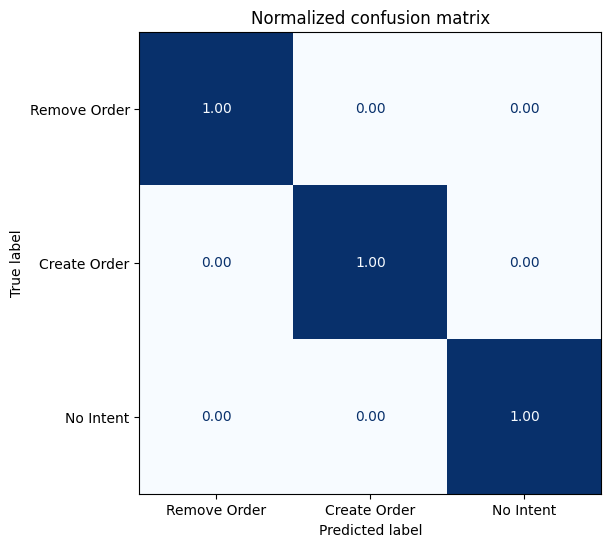

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=set(labels))
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

In [35]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

model_name = "finetuned-intents-classification-model"  
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [36]:
def predict_text(input_texts):
    inputs = tokenizer(input_texts, padding=True, truncation=True, return_tensors="pt")
    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_indices = torch.argmax(logits, dim=1)

    print(outputs, logits, predicted_indices)
    
    label_mapping = {0: "No Intent", 1: "Create Order", 2: "Remove Order"}
    predicted_labels = [label_mapping[idx.item()] for idx in predicted_indices]
    
    return predicted_labels

In [37]:
test_texts = ["I’d like to order a pizza."]
predictions = predict_text(test_texts)
print(predictions)  

SequenceClassifierOutput(loss=None, logits=tensor([[-3.1041,  6.1368, -3.0118]]), hidden_states=None, attentions=None) tensor([[-3.1041,  6.1368, -3.0118]]) tensor([1])
['Create Order']


In [38]:
test_texts = ["Please remove pizza from the order."]
predictions = predict_text(test_texts)
print(predictions)  

SequenceClassifierOutput(loss=None, logits=tensor([[-2.8477, -2.8316,  6.3252]]), hidden_states=None, attentions=None) tensor([[-2.8477, -2.8316,  6.3252]]) tensor([2])
['Remove Order']


In [39]:
test_texts = ["What's the price for a Classic Burger?"]
predictions = predict_text(test_texts)
print(predictions)  

SequenceClassifierOutput(loss=None, logits=tensor([[ 6.4380, -2.8716, -3.0920]]), hidden_states=None, attentions=None) tensor([[ 6.4380, -2.8716, -3.0920]]) tensor([0])
['No Intent']
